# Data Cleaning

Unbeliebte, aber absolut notwendige Tätigkeit zwischen Einlesen und Verarbeiten (Analyse, Visualisierung...).

Eigentlich die Hauptarbeit des Data Scientists.

## Was gehört dazu?

* Fehlende Daten (Missing Data)
* Inkonsistente Daten (Schreibfehler, Datenfehler, Adressen, Zahlenformate...)
* Unnötige Daten: Wiederholungen, Duplikate, usw.
* Nicht normgerechte Daten (Ausreisser)

## Warum Data Cleaning?

Wir betreiben datengetriebene Wissenschaft. Damit sind wir vollkommen abhängig von der Qualität unserer Daten.

Bei allen Verfahren, sei es Visualisierung per Dashboard, Machine Learning, Mining usw. gilt das altbekannte Prinzip:

### Garbage in, garbage out


### Ab in die Praxis: Datensatz ansehen

Beispieldaten: Russian housing market (Quelle: Kaggle)

Hinweis: Im Moodle verfügbar, Nutzung über diesen Kurs hinaus nur nach Anmeldung bei Kaggle erlaubt.

In [1]:
import pandas as pd

df = pd.read_csv("data/sberbank-russian-housing-market/train.csv")
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 292 columns):
 #    Column                                 Dtype  
---   ------                                 -----  
 0    id                                     int64  
 1    timestamp                              object 
 2    full_sq                                int64  
 3    life_sq                                float64
 4    floor                                  float64
 5    max_floor                              float64
 6    material                               float64
 7    build_year                             float64
 8    num_room                               float64
 9    kitch_sq                               float64
 10   state                                  float64
 11   product_type                           object 
 12   sub_area                               object 
 13   area_m                                 float64
 14   raion_popul                         

In [2]:
df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


Schon recht umfangreicher Datensatz. Fast 300 Spalten.

Und schon in den ersten Zeilen ist erkennbar, dass nicht alle Felder besetzt sind. (NaN)

Wichtig bei der Übersicht: numerische und nicht-numerische Daten vorhanden.
Schauen wir nochmal genauer hin:

In [3]:
numeric_cols = df.select_dtypes(include=["number"]).columns
numeric_cols

Index(['id', 'full_sq', 'life_sq', 'floor', 'max_floor', 'material',
       'build_year', 'num_room', 'kitch_sq', 'state',
       ...
       'cafe_count_5000_price_2500', 'cafe_count_5000_price_4000',
       'cafe_count_5000_price_high', 'big_church_count_5000',
       'church_count_5000', 'mosque_count_5000', 'leisure_count_5000',
       'sport_count_5000', 'market_count_5000', 'price_doc'],
      dtype='object', length=276)

In [4]:
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
non_numeric_cols

Index(['timestamp', 'product_type', 'sub_area', 'culture_objects_top_25',
       'thermal_power_plant_raion', 'incineration_raion',
       'oil_chemistry_raion', 'radiation_raion', 'railroad_terminal_raion',
       'big_market_raion', 'nuclear_reactor_raion', 'detention_facility_raion',
       'water_1line', 'big_road1_1line', 'railroad_1line', 'ecology'],
      dtype='object')

## Schritt 1: Missing Data

Lücken in den Daten:
* Sehr üblich in "echten" Datensätzen
* Weiterverarbeitung schwierig (Visualisierung) bis unmöglich (Machine Learning)

Was ist zu tun?
* Aufspüren
* Lücken stopfen oder
* Lückenhafte Bereiche verwerfen

### Aufspüren

Simple Methode: Anzeige per "info"

In [5]:
df[non_numeric_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   timestamp                  30471 non-null  object
 1   product_type               30471 non-null  object
 2   sub_area                   30471 non-null  object
 3   culture_objects_top_25     30471 non-null  object
 4   thermal_power_plant_raion  30471 non-null  object
 5   incineration_raion         30471 non-null  object
 6   oil_chemistry_raion        30471 non-null  object
 7   radiation_raion            30471 non-null  object
 8   railroad_terminal_raion    30471 non-null  object
 9   big_market_raion           30471 non-null  object
 10  nuclear_reactor_raion      30471 non-null  object
 11  detention_facility_raion   30471 non-null  object
 12  water_1line                30471 non-null  object
 13  big_road1_1line            30471 non-null  object
 14  railro

Wie wir sehen, sind alle nicht-numerischen Spalten komplett gefüllt (je 30471 non-null Einträge) - sehr gut!

Für die numerischen Spalten geht es nicht so direkt. Aber es gibt spezielle Methoden dafür:

In [6]:
df.isna()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,False,False,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30468,False,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
30469,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Mmh, etwas unübersichtlich. Lieber mal aggregieren:

In [7]:
num_missing = df.isna().sum()
num_missing[:10]

id                0
timestamp         0
full_sq           0
life_sq        6383
floor           167
max_floor      9572
material       9572
build_year    13605
num_room       9572
kitch_sq       9572
dtype: int64

Oh, da fehlt teils einiges... Wie viel prozentual?

In [8]:
pct_missing = df.isna().mean()
pct_missing[:10]

id            0.000000
timestamp     0.000000
full_sq       0.000000
life_sq       0.209478
floor         0.005481
max_floor     0.314135
material      0.314135
build_year    0.446490
num_room      0.314135
kitch_sq      0.314135
dtype: float64

Das sind schon mal wichtige Ergebnisse:
* bei wenigen fehlenden Elementen (z.B. floor) kann man über Imputation nachdenken (Lücken füllen)
* Spalten, bei denen fast die Hälfte fehlt (z.B. build_year) sind kaum zu retten (löschen)

### Aufspüren 2: Visualisierung

Natürlich kann uns auch hier eine Visualisierung helfen. Geeignet ist beispielsweise eine Heatmap.

Wir schränken uns zur besseren Veranschaulichung auf die ersten 30 Spalten ein.

Hinweis: Hier wird "seaborn" als zusätzliche Bibliothek verwendet. Diese müssen sie wahrscheinlich noch installieren. Ich arbeite noch an einer Lösung mit matplotlib - die eigentlich auch möglich sein sollte...


In [16]:
# !C:\Users\roelkeheiko\PycharmProjects\arc\venv\Scripts\python.exe -m pip install --upgrade pip
#  siehe auch: https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/

In [18]:
# !{sys.executable} -m pip install matplotlib

  Using cached matplotlib-3.6.2-cp310-cp310-win_amd64.whl (7.2 MB)


In [19]:
# !{sys.executable} -m pip install seaborn

  Using cached seaborn-0.12.1-py3-none-any.whl (288 kB)


<AxesSubplot: >

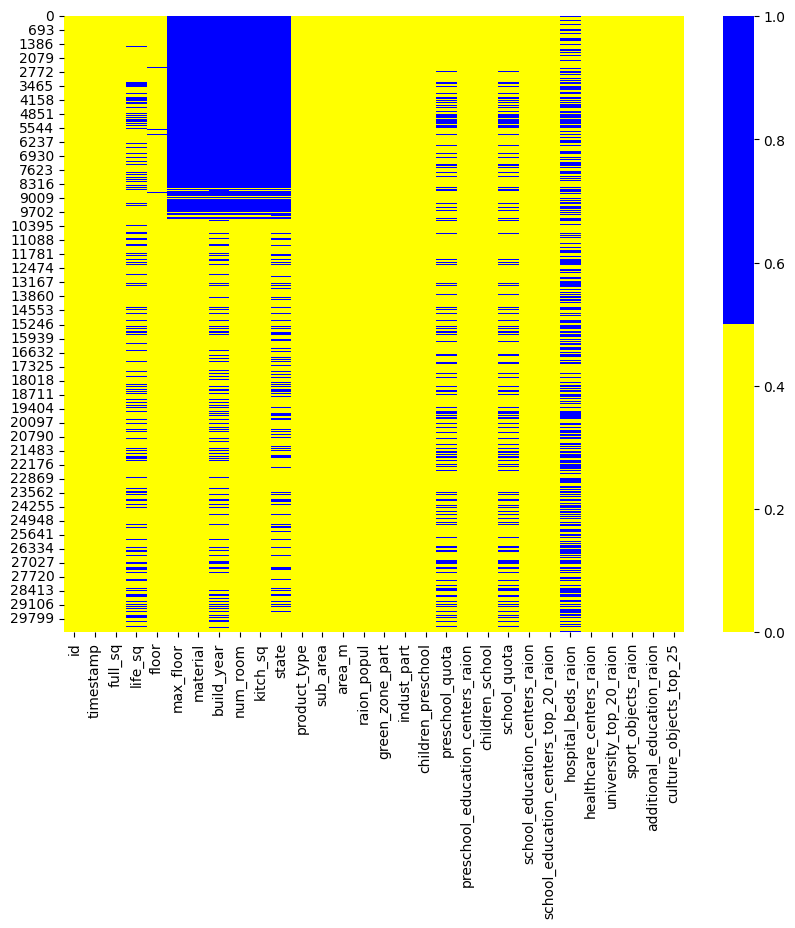

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
cols = df.columns[:30]

colors = ["yellow", "blue"]
sns.heatmap(df[cols].isna(), cmap=sns.color_palette(colors))

Das ist jetzt schon sehr interessant: Bei einigen Spalten sind die Missings gut verteilt, bei anderen konzentriert.

Beispiele:
* life_sq fehlt breit verstreut
* max_floor fehlt in den ersten ca. 10.000 Datensätzen, danach durchgehend vorhanden

Hinweis: Natürlich fehlen in der Darstellung Einträge, es sind ja keine 30.000 Pixel in der Vertikale. Aber eine Tendenz ist trotzdem gut zu erkennen.

Was bringt uns das? Wir können statt Spalten rauszuwerfen auch Zeilen ausschliessen und nur diejenigen analysieren, die vollständiger sind.
Dafür können wir auch auf die Methoden von vorher zurückgreifen: Datenbereich einschränken und dann erneut durchzählen.

### Aufspüren 3: Zeilenweise

Natürlich kann auch in den einzelnen Datensätzen nach Missings gesucht werden.
* Wie viele Datensätze sind vollständig?
* Bei wie vielen fehlen 1,2,3... Datenpunkte
* usw.

Erweiterung/Veranschaulichung der Zählmethode von oben.
#### Visualisierung per Histogramm

<AxesSubplot: >

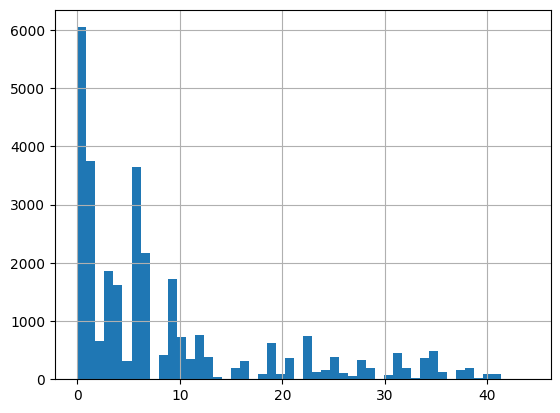

In [21]:
missing_by_row = df.isna().sum(axis='columns')
missing_by_row.hist(bins=50)

Also: mehr als 6000 Datensätze sind vollständig. Ein Grossteil der Datensätze hat weniger als 10 fehlende Datensätze.

Im konkreten Anwendungsfall wird man dies noch weiterführen und versuchen, die Datensätze weiter einzuschränken.

Oder: Herauszufinden, warum Daten fehlen. Evtl. können diese noch beschafft werden oder zukünftige Datenerhebungen können besser funktionieren. Oder, oder.


## Daten bereinigen

Wichtig: Es gibt nicht die eine, beste Methode für jeden Datensatz. Die Art der Datenbereinigung muss immer situationsabhängig entschieden werden.

Im Zweifelsfall lieber unterschiedliche Methoden ausprobieren und die Ergebnisse vergleichen.

### Bereinigen: Spalten löschen

Spalten im Datensatz entsprechen "Features", also Merkmalsausprägungen der erhobenen Daten bzw. der zugrundeliegenden Ereignisse oder Untersuchungsgegenstände.

Das Löschen von Features ist immer "schmerzhaft", aber oft nicht zu vermeiden.

Wie schon weiter oben angetönt, löschen wir Spalten mit einem hohen Anteil fehlender Daten. Hier als Beispiel bei mehr als 30%.

In [22]:
pct_missing[pct_missing > .3]

max_floor                     0.314135
material                      0.314135
build_year                    0.446490
num_room                      0.314135
kitch_sq                      0.314135
state                         0.444980
hospital_beds_raion           0.473926
cafe_sum_500_min_price_avg    0.435857
cafe_sum_500_max_price_avg    0.435857
cafe_avg_price_500            0.435857
dtype: float64

In [23]:
df_less_missing_cols = df.loc[:, pct_missing <= 0.3].copy()
df_less_missing_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Columns: 282 entries, id to price_doc
dtypes: float64(109), int64(157), object(16)
memory usage: 65.6+ MB


In [24]:
# Alternative:
df_less_missing_cols_2 = df.drop(columns=pct_missing[pct_missing > .3].index)
df_less_missing_cols_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Columns: 282 entries, id to price_doc
dtypes: float64(109), int64(157), object(16)
memory usage: 65.6+ MB


### Bereinigen: Zeilen löschen

Genau wie Spalten (Features) lassen sich natürlich auch Zeilen löschen, falls zu viele Einträge fehlen.

Hier wird der Wert auf maximal 35 fehlende Werte pro Datensatz festgelegt. (rein willkürlich)

In [29]:
df_less_missing_rows = df[missing_by_row < 36].copy()
df_less_missing_rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29779 entries, 0 to 30470
Columns: 292 entries, id to price_doc
dtypes: float64(119), int64(157), object(16)
memory usage: 66.6+ MB


In [30]:
# Alternativ möglich:
df_less_missing_rows_2 = df.dropna(axis="index", thresh=292-35)
df_less_missing_rows_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29779 entries, 0 to 30470
Columns: 292 entries, id to price_doc
dtypes: float64(119), int64(157), object(16)
memory usage: 66.6+ MB


### Bereinigen: Imputation

Statt zu Löschen können Daten natürlich auch ergänzt werden. Da wir die echten Daten nicht kennen, müssen wir welche "hinzumogeln". Das nennt man Imputation.

#### Imputation mittels konstanter Werte

Geht es nur darum, keine fehlenden Werte im Datensatz zu haben (beispielsweise damit ein Verfahren überhaupt funktioniert), können die fehlenden Werte einfach mit Konstanten ergänzt werden. Diese Konstanten können auch so gestaltet werden, dass sie später noch gut erkennbar sind.

Im Beispiel werden wir fehlende numerische Werte durch -999 ersetzen und nicht-numerische Werte durch "_MISSING_". Letzteres ist rein exemplarisch, da ja nichts fehlte.

In [31]:
df_copy = df.copy()
df_copy[numeric_cols] = df_copy[numeric_cols].fillna(-999)
df_copy[non_numeric_cols] = df_copy[non_numeric_cols].fillna("_MISSING_")
df_copy

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,319,108,17,135,236,2,91,195,14,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,2015-06-30,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,...,15,5,0,15,26,1,2,84,6,7400000
30467,30470,2015-06-30,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,...,313,128,24,98,182,1,82,171,15,25000000
30468,30471,2015-06-30,45,-999.0,10.0,20.0,1.0,-999.0,1.0,1.0,...,1,1,0,2,12,0,1,11,1,6970959
30469,30472,2015-06-30,64,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,...,22,1,1,6,31,1,4,65,7,13500000


Alle Lücken geschlossen?

In [32]:
df_copy.isna().sum()

id                    0
timestamp             0
full_sq               0
life_sq               0
floor                 0
                     ..
mosque_count_5000     0
leisure_count_5000    0
sport_count_5000      0
market_count_5000     0
price_doc             0
Length: 292, dtype: int64

#### Imputation mittels Statistik

Statt deutlich gekennzeichneter Werte (quasi neue Ausreisser) können wir auch versuchen, die Daten nachzubilden. So können ggf. bessere Analyseergebnisse erzielt werden.

Die fehlenden Werte können beispielsweise durch Mittelwert, Modus oder Median ersetzt werden. Auch komplexere Verteilungsnachbildungen sind möglich (gleichverteilt, normalverteilt,...). Nicht-numerische Werte lassen sich quasi auch durch den Modus ersetzen oder oder.

Hinweis: Vorsicht mit einem solchen Verfahren bei vielen fehlenden Werten. Die Gefahr ist gross, dass die spätere Analyse genau die Imputation als Ergebnis wiederfindet!

In [35]:
df_copy = df.copy()
med = df_copy[numeric_cols].median()
df_copy[numeric_cols] = df_copy[numeric_cols].fillna(med)
df_copy

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,12.0,1.0,1979.0,2.0,6.0,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,12.0,1.0,1979.0,2.0,6.0,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,12.0,1.0,1979.0,2.0,6.0,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,12.0,1.0,1979.0,2.0,6.0,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,12.0,1.0,1979.0,2.0,6.0,...,319,108,17,135,236,2,91,195,14,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,2015-06-30,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,...,15,5,0,15,26,1,2,84,6,7400000
30467,30470,2015-06-30,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,...,313,128,24,98,182,1,82,171,15,25000000
30468,30471,2015-06-30,45,30.0,10.0,20.0,1.0,1979.0,1.0,1.0,...,1,1,0,2,12,0,1,11,1,6970959
30469,30472,2015-06-30,64,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,...,22,1,1,6,31,1,4,65,7,13500000


Schon wesentlich dichter an "echten Daten". Darin liegt aber auch die Gefahr dieses Ansatzes.

In [36]:
most_freq = df_copy[non_numeric_cols].describe().loc['top']
most_freq

timestamp                             2014-12-16
product_type                          Investment
sub_area                     Poselenie Sosenskoe
culture_objects_top_25                        no
thermal_power_plant_raion                     no
incineration_raion                            no
oil_chemistry_raion                           no
radiation_raion                               no
railroad_terminal_raion                       no
big_market_raion                              no
nuclear_reactor_raion                         no
detention_facility_raion                      no
water_1line                                   no
big_road1_1line                               no
railroad_1line                                no
ecology                                     poor
Name: top, dtype: object

In [38]:
# einfüllen in den Datensatz (wieder nur exemplarisch)
df_copy[non_numeric_cols] = df_copy[non_numeric_cols].fillna(most_freq)

## Data Cleaning: Ausreisser

Es gibt mehrere statistische Verfahren zur Ausreissererkennung. Ein mögliches Verfahren zu Hinweisen auf Ausreisser ist die sogenannte "Kurtosis", also ein Mass für die Abweichung von der Normalverteilung - auch "Wölbung" genannt.

Werfen wir einen Blick auf unseren Datensatz:

In [39]:
df.kurt(numeric_only=True)[:10]

id               -1.199940
full_sq       12128.727462
life_sq       17058.409645
floor             1.731182
max_floor         6.595262
material          1.358512
build_year    16865.716093
num_room         13.292374
kitch_sq       4680.043742
state            88.399730
dtype: float64

Hohe Werte bei "life_sq" und "build_year" - schauen wir beim ersten genauer hin (warum nicht beim zweiten?).

In [40]:
df['life_sq'].describe()

count    24088.000000
mean        34.403271
std         52.285733
min          0.000000
25%         20.000000
50%         30.000000
75%         43.000000
max       7478.000000
Name: life_sq, dtype: float64

Das Maximum scheint ein Kandidat für einen Ausreisser zu sein...

#### Ausreisser: Visualisierung

Ein weiteres Verfahren haben wir schon kennengelernt: Visualisierung mittels Histogramm. Neu dazu nehmen wir Boxplots.

<AxesSubplot: >

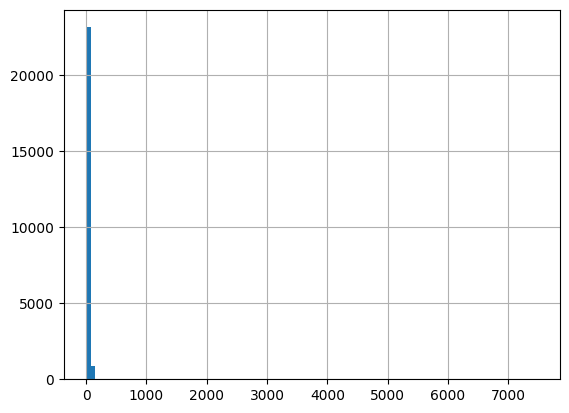

In [41]:
df['life_sq'].hist(bins=100)

Verdächtig, aber nicht informativ. Werte sind nicht sichtbar...

<AxesSubplot: >

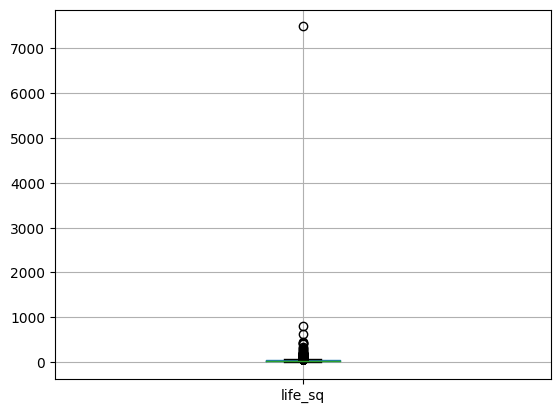

In [42]:
df.boxplot(column=['life_sq'])

Der 7000-Wert scheint ein klarer Ausreisser zu sein. Es gibt aber noch mehr Ausreisser-Kandidaten (die anderen Kringel).

<AxesSubplot: >

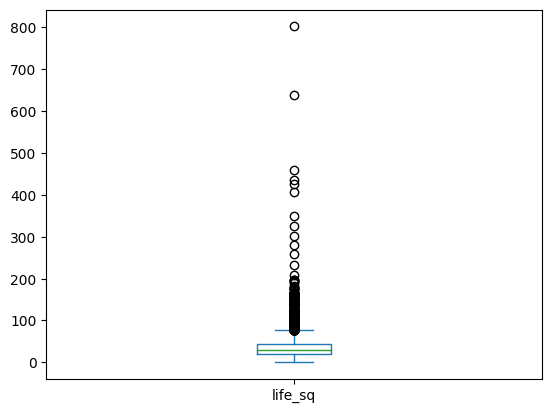

In [45]:
df.life_sq[df.life_sq < 1000].plot.box()

<AxesSubplot: >

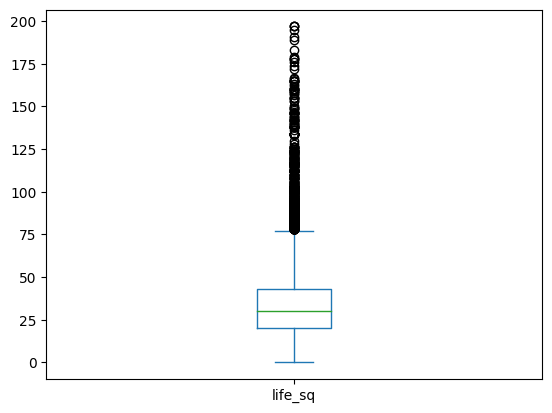

In [46]:
df.life_sq[df.life_sq < 200].plot.box()

Russische Wohnungen scheinen nicht besonders gross zu sein...

#### Ausreisser bei nicht-numerischen Daten

Etwas schwieriger zu finden. Zum Beispiel durch Inspektion der Daten bzw. ihrer Kategorien.

<AxesSubplot: >

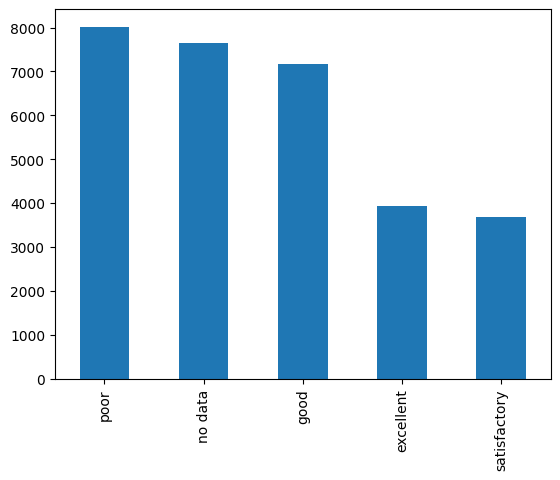

In [47]:
df['ecology'].value_counts().plot(kind='bar')

Weitere Methoden hängen von den Daten ab. Plots können hilfreich sein, gerade auch Scatter-Plots. Bei Datumswerten kann die Spannweite gute Anhaltspunkte geben oder auch aggregierte Zeiträume. Und vieles weiteres mehr...

#### Behandlung von Ausreissern

Prinzipiell sind die gleichen Verfahren denkbar wie bei fehlenden Daten: Löschen oder Ausschliessen von Spalten/Zeilen, Umwandeln in passendere Werte usw.

Material basiert teilweise auf weiteren Internetquellen:
https://www.justintodata.com/data-cleaning-techniques-python-guide/
https://realpython.com/python-data-cleaning-numpy-pandas/#%%